<a href="https://colab.research.google.com/github/ShivSubedi/TraditionalML_PredictiveAnalytics_basics/blob/main/Linear_Regression%5CUnivariate_Linear_Regression_Analysis_with_test_LinearityAssumptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Linear Regression Analysis
This project demonstrates a simple linear regression model, using a single independent variable (SAT score) to predict the dependent variable (GPA).

The approach is inspired by concepts presented in the 'Complete Data Science Bootcamp 2025' course on Udemy, and it expands on these fundamental principles with a detailed explanation of the modeling process, results, and linearity assumption testing.

##Step 1: Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns #here we will code using matplotlib, but use 'seaborn' styles
sns.set() # overrides the style and the graphics of all matplotlib graphs

## Step2: Load the Data
Data is saved in the github and will be imported from the github url

In [3]:
# Download the file from GitHub
github_Rawpath_to_simpleLinearReg_data = "https://raw.githubusercontent.com/ShivSubedi/TraditionalML_PredictiveAnalytics_basics/refs/heads/main/Linear_Regression/Simple_linear_regression.csv"
!wget -O Simple_linear_regression.csv {github_Rawpath_to_simpleLinearReg_data} #download the csv file

--2025-03-24 16:07:25--  https://raw.githubusercontent.com/ShivSubedi/TraditionalML_PredictiveAnalytics_basics/refs/heads/main/Linear_Regression/Simple_linear_regression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 922 [text/plain]
Saving to: ‘Simple_linear_regression.csv’

Simple_linear_regre 100%[===================>]     922  --.-KB/s    in 0s      

2025-03-24 16:07:25 (49.5 MB/s) - ‘Simple_linear_regression.csv’ saved [922/922]



In [4]:
#Load the data
data_csv = pd.read_csv('Simple_linear_regression.csv')

In [26]:
#explore the data type and verify data exists
print(type(data_csv)) #check the type of the variable
print(data_csv.dtypes) #checks data types of each column in the dataframe
print(data_csv.head(10)) #prints the first 10 row entries of the data
print(len(data_csv))

<class 'pandas.core.frame.DataFrame'>
SAT      int64
GPA    float64
dtype: object
    SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83
5  1670  2.91
6  1764  3.00
7  1764  3.00
8  1792  3.01
9  1850  3.01
84


## Step 3: Descriptive Statistics
Outputs the basic descriptive statistics of the data i.e [min, max], mean, quartiles, s.d., count

In [6]:
data_csv.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Step 4: Create Regression model

### 4(A) Define the dependent and independent variables
Let's define a predictive model using linear regression between independent variable 'x' and dependent variable 'y' using the equation: y = m*x + c, where 'm' is the slope of the fit line and 'c' is its y-intercept.

In the data provided, 'SAT' score will be the independent variable, and 'GPA' value will be the dependent variable

In [7]:
x= data_csv['SAT'] #defining the independent variable
y= data_csv['GPA'] #defining the dependent variable

### 4(B) Perform Exploratory Data Analysis (EDA)
Here, we use scatter plot to perform EDA.

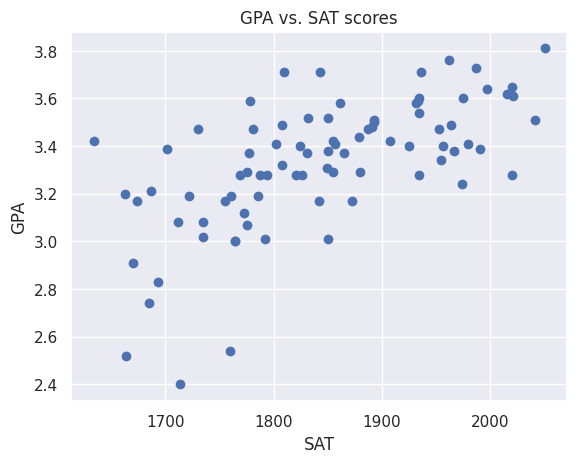

In [8]:
plt.scatter(x,y)  #define a scatter plot
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('GPA vs. SAT scores') #define the title of the plot
plt.show() #show the scatter plot

### 4(C) Perform Regression analysis
Here, we perform following steps:
1. Prepare the independent variable data (X) for linear regression by adding a constant term.

A linear regression model: y = mx+c can also be represented in a polynomial form: y = c*x<sup>0</sup> + m*x<sup>1</sup>, where x<sup>0</sup> =1.

When performing linear regression in Python using libraries like statsmodels or scikit-learn, calculations are often done using matrix operations. To accommodate the constant term 'c' in matrix form, we need to represent it as a separate column of 1s. This column of 1s effectively multiplies the intercept 'c' in the matrix calculation, ensuring that 'c' is included in the model.

In [9]:
#Constant term (new column of 1s with same length as x) is added
x1= sm.add_constant(x)
#view before and after of adding a constant column
print(x.head(5)) #returns first 5 rows of data
print(x1.head(5)) #from here we can confirm that a column of 1 is added

0    1714
1    1664
2    1760
3    1685
4    1693
Name: SAT, dtype: int64
   const   SAT
0    1.0  1714
1    1.0  1664
2    1.0  1760
3    1.0  1685
4    1.0  1693


2. Fit a linear regression model using the OLS (Ordinary Least Square) method, with dependent variable 'y' and new independent variable 'x1'

In [10]:
result_OLS = sm.OLS(y,x1).fit()
#Extract the coefficients
coeff = result_OLS.params
intercept = coeff[0]
slope = coeff[1]
print('Intercept of the fit (c):', intercept)
print('Slope of the fit (m):', slope)

Intercept of the fit (c): 0.27504029966028876
Slope of the fit (m): 0.0016556880500928112


<ipython-input-10-9e4426fee37b>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeff[0]
<ipython-input-10-9e4426fee37b>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeff[1]


3. Print/Display the summary of the fit

**What to look-out in the summary?**

A) Model Fit Strength (R-squared & Adjusted R-squared):


- **R-squared:**
 - measures goodness of fit of the model (i.e. how well the model fits the data).
 - is the ratio of variability explained by regression to the total variability of the dataset.
 - Represents the proportion of variance in the dependent variable (y) explained by the independent variables (x), i.e., how much of the total variability of the data is explained by regression model.
 - Has value [0, 1]. A higher value (closer to 1) indicates a better fit.
 - Consider the context; a "good" R-squared varies across disciplines.
 -Example: If 0.406, indicates ~ 40% variance in GPA is explained by SAT score. It is a moderate fit. While statistically significant, a considerable portion of GPA variance is left unexplained, suggesting other influential factors.

- Adjusted R-squared:
 - Like R-squared, measured how well the regression model fits the data.
 - Accounts for the number of predictors, penalizing the inclusion of unnecessary variables.
 - Use when comparing models with different numbers of predictors.
 - It is always lower than the R squared.
 -Example: If 0.399

B) Overall Model Significance (F-statistic & Prob(F-statistic)):

- F-statistic:
 - Tests if the independent variables, as a group, have a significant effect on the dependent variable.
 - A high F-statistic suggests a significant relationship.

- **Prob(F-statistic):**
- The p-value associated with the F-statistic.
- A low p-value (typically < 0.05) indicates the overall model is statistically significant.


 C) Individual Variable Significance (Coefficients & P>|t|):

 - **Coefficients (coef):**
  - Estimated values of the regression coefficients (e.g. 'm' and 'c').
  - Indicate the change in the dependent variable for a one-unit change in the independent variable.
  - Sign and magnitude are crucial.

 - t-statistic:
  - = coeff/standard error
  - small t-statistic will resuls in a high p-value (P>|t|).

- **P>|t| (p-value):**
  - Tests the significance of individual coefficients.
  - A low p-value (typically < 0.05) indicates the coefficient is statistically significant.
  - Confidence intervals also help to verify significance.


  D) Assumption Violations (Residual Diagnostics: Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis):

- **Omnibus & Jarque-Bera (JB):**
  - Test the normality of residuals.
  - Significant p-values indicate **non-normal residuals.**
  - JB test quantifies how far the distribution is from a normal distribution based on the skewness and kurtosis.


- **Durbin-Watson:**
  - Tests for **autocorrelation** (independence) of residuals.
  - Values far from 2 indicate potential autocorrelation.

- Skew & Kurtosis:
  - Describe the shape of the residual distribution.
  - Deviations from 0 (skew) and 3 (kurtosis) suggest non-normality.
  - Residual analysis is important for model validity.


 E) Multicollinearity (Condition Number):

- Condition Number:
  - Refers to a situation in multiple linear regression where two or more independent variables are highly correlated.
  - High values suggest multicollinearity, which can destabilize coefficient estimates.
  - This is very important when there are multiple independent variables.

In [11]:
result_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           7.20e-11
Time:                        16:07:59   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here's a breakdown explanation of the results:

A) Model Fit Strength (R-squared & Adjusted R-squared):


- R-squared = 0.406, indicates ~ 40% variance in GPA is explained by SAT score. It is a moderate fit. While statistically significant, a considerable portion of GPA variance is left unexplained, suggesting other influential factors like income, gender, marital status etc. to be included to understand the full picture.

- Adjusted R-squared = 0.399, due to only having one independent variable in the model, the difference between R-squared and Adjusted R squared is minimal.

B) Overall Model Significance (F-statistic & Prob(F-statistic)):

- F-statistic = 56.05, represents a high F-statistic
- **Prob(F-statistic)** = 7.20e-11 (< 0.05), which is extremely low, indicating the **model is higlighly statistically significant.**


 C) Individual Variable Significance (Coefficients & P>|t|):

 - Coefficients (coef): from the fit, m (i.e., SAT) = 0.0017 ± 0.0000 and c = 0.2750 ± 0.409. <font color='red'>However, the estimated effect of SAT on GPA (0.0017) is less precise due to autocorrelation.
  - Impact on Standard Errors: Autocorrelation typically leads to an underestimation of the standard errors of the coefficients. The standard error for SAT (0.000) is likely underestimated. This is a major problem because standard errors are used to calculate t-statistics and p-values.
  - Impact on Hypothesis Testing (Significance of SAT): Because the standard errors are underestimated, the t-statistics are inflated, and the p-values are deflated. This increases the risk of a Type I error (falsely rejecting the null hypothesis). The very small p-value for SAT (0.000) is highly suspect. The autocorrelation makes it much more likely that we are incorrectly concluding that SAT is a significant predictor of GPA. We might be observing a statistically significant result that is not truly significant.</font>
  

- **P>|t| (p-value):**
  -  P>|t| (const) = 0.503 (>> 0.05), is a high p-value, indicating that intercept term is **not statistically significant.**
  -  P>|t| (SAT) = 0.000 (< 0.05), which is extremely low, indicating high statistical significance. <font color='red'>However, because of the non-normality, this p-value might be less reliable than we'd like. There's an increased risk of a Type I error (falsely rejecting the null hypothesis that SAT has no effect on GPA). Even though the p-value is very small, we should be cautious about overstating the significance of SAT. The non-normality makes the p-value less trustworthy. </font>
  


  D) Assumption Violations (Residual Diagnostics: Omnibus, Durbin-Watson, Jarque-Bera, Skew, Kurtosis):

- prob(Omnibus) i.e. p-value = 0.002 (< 0.05), indicating **residuals are significantly non-normally distributed.**

- prob(JB) = 0.000310 (<< 0.05), **indicating non-normality in residuals.**

- Durbin-Watson = 0.950, far from 2 (the ideal for no autocorrelation), suggesting **potential autocorrelatioin the residuals.**
  
- Skew = -0.722, indicates negative skew
- Kurtosis = 4.590, indicates heavier tails than a normal distribution
  


 E) Multicollinearity (Condition Number):

- Condition Number = 3.29e+04, a high value, but less concerning in this single-predictor model.


**Summary:**
- prob(F-statistic) suggest that model is statistically significant (i.e., we can trust that there is a relationship between the variables 'x' and 'y'), but
- assumption (normality and auto-correlation) violations reduce the reliability of the statistical inferences (i.e., can't trust the exact values of the coefficients, or the p-values associated withe the individual coefficients.)
- In short: the model can still be used for prediction, but the confidence of the predictions is lowered.
  

4. Plot the regression equation with the data

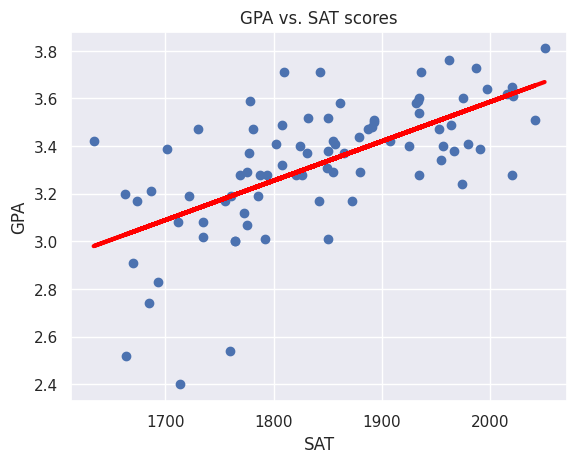

In [12]:
plt.scatter(x,y)  #define a scatter plot
#Define the regression model
yhat = slope*x + intercept
fig = plt.plot(x, yhat, lw=3, c='red', label='Linear Reg. fit')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('GPA vs. SAT scores') #define the title of the plot
plt.show() #show the scatter plot

## Step 5: Check if the assumptions of Linear Regression Model hold
There are 5 main assumptions of linear regression model:

1. **Linearity:** The relationship between the dependent and independent variables is linear.
 - Test: Draw residual plot, mean(residuals) = 0
2. **Independence:** The observations are independent of each other.
  - Test: Observe Durbin-Watson Test.
3. **No autocorrelation:** The residuals are not correlated with each other.
  - Test: Observe Durbin-Watson Test.
4. **Homoscedasticity:** The variance of errors (residuals) is constant across all levels of the independent variable(s).
 - Test: Draw residual plot, variance(residuals) = constant
5. **Normality:** The errors (residuals) are normally distributed.
  - Test: Observe the p-value of Jarque-Bera (JB) test, Kursosis and Skewness values. Can additionally plot a histogram of residuals and overlay the normal distribution for comparison.
6. **No multicollinearity:** The independent variables are not highly correlated with each other.
  - Since, we only have one independent variable in this model, we can't test multicollinearity.


Let's see how we can confirm or deny the above assumptions:

### 5(A) Linearity
Draw a 'Residual plot' (plot of residuals vs fitted values).

**Residuals** are the differences between the observed and fitted values. **Fitted values** refer to the predicted values from the model.

- Residual Plot Expectation:
  - Residuals should be randomly scattered around zero (no clear curve or trend).
  - If residuals show a curved pattern, this indicates non-linearity, suggesting that a linear model may not be the best fit.
- **Key Focus:** The mean of residuals should be zero across all fitted values.
- **Result:** Observed random scatter of residuals around 0. Also calculated mean-residual = 0.0. This supports linearity.

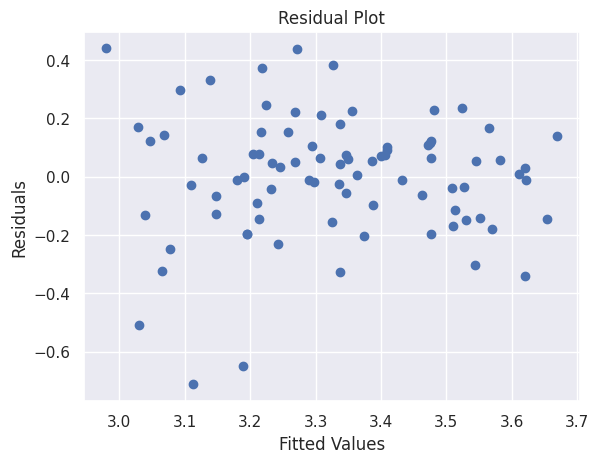

Mean of residuals: -0.00000


In [13]:
residuals = result_OLS.resid #extract the residuals
fitted_values = result_OLS.fittedvalues #fitted (predicted values) from the model

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

mean_residual = np.mean(residuals)
print(f"Mean of residuals: {mean_residual:.5f}")

### 5(B) Independence (of observations)

- Independence refers to the condition where each observation (data point) in the dataset is unrelated to every other observation.
- In the context of a **linear regression model**, independence implies that the residuals (errors) of the model are independent of each other, meaning value of one residual should not give any information about the value of another residual.
- **Violating independence guarantees autocorrelation, but violating autocorrelation doesn’t automatically imply full independence is violated (e.g. in time series data).**
- Can be tested using **Durbin-Watson:** test:
  - Primarily tests for **first order autocorrelation**  of residuals. If residuals are auto-corelated they are not independent.
  - The test statistic ranges from 0 to 4:
    - DW ≈ 2: Residuals are likely independent, with no autocorrelation.
    - DW < 2: Positive autocorrelation (residuals are correlated).
    - DW > 2: Negative autocorrelation (residuals are inversely correlated).

**Result:**
-  We get DW = 0.95, suggest **potential positive auto-corelation** of residuals.
- This suggests that there may be a correlation between consecutive residuals, which could indicate **dependence between observations.**


### 5(C) No-autocorelation (of residuals)
- Refers specifically to the absence of correlation between consecutive (or nearby) residuals in time-series or ordered data.
- Autocorrelation means that the residuals at one point in time are related to residuals at another time point.
- What is the difference with Independence?
    - Autocorrelation refers to the correlation of residuals over time or in a sequence. In time-series data or ordered data, residuals can be correlated with each other, meaning that errors made at one point in time are related to errors made at a previous point.
    - Independence, on the other hand, means that the residuals (or observations) are completely unrelated to each other.
- **Result:** We get DW =0.95, implying positive auto-corelation of residuals.

### 5(D) Homoscedasticity (Constant Variance)
- The variance (spread) of residuals is constant across all levels of the independent variable.
- To confirm above, plot 'Residual vs predicted values'
- Residual Plot Expectation:
  - Residuals should be randomly scattered with a consistent spread (equal variance) across all predicted values.
  - If residuals form a cone shape (fanning out or narrowing), this indicates heteroscedasticity.
- **Key Focus:** The spread of residuals should be constant.
-**Result:** As obtained in the residual plot, it supports equal variance i.e., homoscedasticity.

### 5(E) Normality
- Verified using the **Omnibus & Jarque-Bera (JB)** values
  - Test the normality of residuals.
  - Significant p-values indicate non-normal residuals.
  - JB test quantifies how far the distribution is from a normal distribution based on the skewness and kurtosis.
  -JB (H0): Data is normally distributed
- Skewness.
  - Skewness measures the asymmetry of a probability distribution
  - Types:
    - Symmetrical Distribution (Skewness = 0): The distribution is balanced around the mean, like a **normal distribution**.
    - Positively Skewed (Skewness > 0): The tail of the distribution extends to the right. Most of the data is concentrated on the left, and there are some extreme values to the right.
    - Negatively Skewed (Skewness < 0): The tail of the distribution extends to the left. Most of the data is concentrated on the right, and there are some extreme values to the left.
- Kurtosis:
  - Kurtosis measures the "tailedness" or peakedness of a distribution relative to a normal distribution.
  - Types:
    - Leptokurtic (Kurtosis > 3): A distribution with a higher peak and heavier tails than a normal distribution.
    - Platykurtic (Kurtosis < 3): A distribution with a flatter peak and lighter tails than a normal distribution.
    - Mesokurtic (Kursosis = 3): A distribution with a peak and tails similar to a **normal distribution**.


  - Normal distribution:
    - Skewness = 0
    - Kurtosis = 3

- Normality, can also be verified by plotting a histogram of the residual values (should look bell-shaped).

- **Result:**
  - prob(Omnibus) i.e. p-value = 0.002 (< 0.05), indicating residuals are significantly non-normally distributed.
  - prob(JB) = 0.000310 (<< 0.05), reject H0, indicating non-normality in residuals.
  - Skewness= -0.722 < 0 => Negatively skewed, i.e. tail towards left
  - Kurtosis = 4.550 > 3 => Leptokurtic,i.e. higher peak and heavier tails

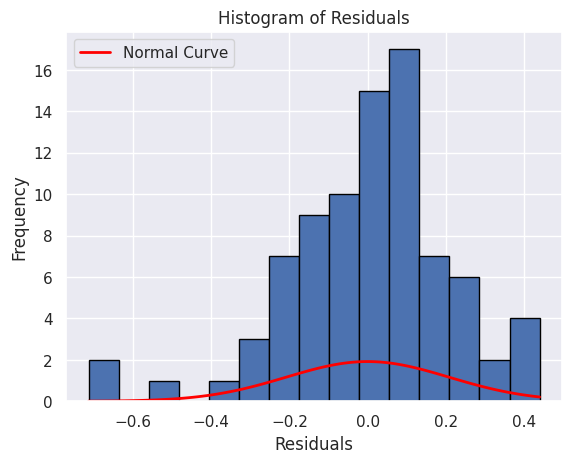

In [25]:
import scipy.stats as stats  # This is required to use 'stats'
#plot histogram of the residuals
residuals = result_OLS.resid
plt.hist(residuals, bins=15, edgecolor='black')


# Overlay normal distribution curve
mean, std = np.mean(residuals), np.std(residuals)
x = np.linspace(min(residuals), max(residuals), 100)
plt.plot(x, stats.norm.pdf(x, mean, std), color='red', linewidth=2, label='Normal Curve')


plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Step 6: Summarization of the violations in linearity assumptions and their impact
In this linear regression model with 84 observations, the violations of assumptions have the following impacts:

- **Non-Normality:** The non-normality of the residuals, indicated by the Jarque-Bera test, raises concerns about the reliability of statistical inferences. Because the test suggests the data's skewness and kurtosis deviate from a normal distribution, *the accuracy of p-values and confidence intervals is affected.*

- **Autocorrelation:** The presence of autocorrelation, shown by the Durbin-Watson statistic, is a major concern. Because the Durbin-Watson statistic indicates positive autocorrelation, the p-value for SAT is likely invalid, *making it difficult to confidently claim SAT is a significant predictor, and the coefficient estimates are less precise.*

## Step 7: How to address the above violations in linearity assumptions?
**Increase Sample Size (for normality):**
- If feasible, increasing the sample size can help mitigate the impact of non-normality.
- With larger samples, the Central Limit Theorem becomes more effective in ensuring that the distribution of the sampling mean is approximately normal, even if the underlying data is not.

**Generalized Least Square (GLS) method:**
- GLS is used when OLS assumptions are violated, particularly heteroscedasticity (non-constant variance) and autocorrelation (correlation between errors), to provide more efficient estimates.
- GLS works by transforming the data in a way that makes the OLS assumptions valid for the transformed data.